## Google Play Store Apps Data Visualizaiton

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

In [2]:
gpsa = pd.read_csv('./gpsa.csv', index_col = 0)
gpsa.head()

,App,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size(M),Price($),Android Ver req,Revenue_est($)
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,500,Free,Everyone,Sports,"October 7, 2017",0.22,4.1 and up,3.600,0.0,4.1,0.0
1,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,1000000,Free,Everyone,Social,"August 2, 2018",5.03,4.1 and up,22.000,0.0,4.1,0.0
2,- Free Comics - Comic Apps,COMICS,3.5,115,10000,Free,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up,9.100,0.0,5.0,0.0
3,.R,TOOLS,4.5,259,10000,Free,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up,0.203,0.0,1.5,0.0
4,/u/app,COMMUNICATION,4.7,573,10000,Free,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up,53.000,0.0,4.1,0.0


In [3]:
gpsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 15 columns):
App                9659 non-null object
Category           9659 non-null object
Rating             8196 non-null float64
Reviews            9659 non-null int64
Installs           9659 non-null int64
Type               9658 non-null object
Content Rating     9659 non-null object
Genres             9659 non-null object
Last Updated       9659 non-null object
Current Ver        9651 non-null object
Android Ver        9657 non-null object
Size(M)            8431 non-null float64
Price($)           9659 non-null float64
Android Ver req    9657 non-null object
Revenue_est($)     9659 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.2+ MB


In [4]:
gpsa['Revenue_est($M)'] = gpsa['Revenue_est($)']/1000000

### Revenue Breakdown by Category

In [5]:
cat = gpsa. groupby('Category').agg({'App':'count', 'Installs':'sum', 'Revenue_est($M)':'sum', 'Rating':'mean', 'Reviews':'sum'})
cat = cat.sort_values('Revenue_est($M)', ascending = False).reset_index()
cat

,Category,App,Installs,Revenue_est($M),Rating,Reviews
0,FAMILY,1874,6221541505,115.674845,4.183445,193470282
1,LIFESTYLE,369,503823539,57.583939,4.093355,11832692
2,GAME,946,13457924415,40.688637,4.244605,590772190
3,FINANCE,345,455348734,25.726679,4.115563,12662973
4,PHOTOGRAPHY,281,4658147655,8.547768,4.155894,105580472
5,PERSONALIZATION,376,1532494782,6.796948,4.332215,53543117
6,MEDICAL,395,38293077,5.956237,4.165862,1187538
7,TOOLS,829,8102771915,5.464821,4.040278,229471630
8,SPORTS,325,1096474498,4.706212,4.216154,35349158
9,PRODUCTIVITY,374,5793091369,4.313375,4.183389,55590856


In [6]:
print('total estimated revenue($M):{}'.format(cat['Revenue_est($M)'].sum()))

total estimated revenue($M):291.1401687900001


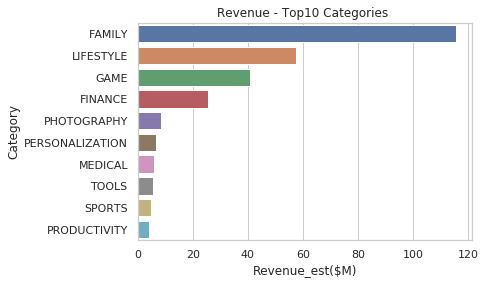

In [7]:
sns.barplot(x=cat.head(10)['Revenue_est($M)'],y=cat.head(10).Category)
plt.title('Revenue - Top10 Categories ')

### Highest Revenue App in Each Category

In [8]:
ix = gpsa.groupby('Category')['Revenue_est($)'].idxmax()
cat_max = gpsa.loc[ix]
cat_max['Revenue_est($M)'] = cat_max['Revenue_est($)']/1000000
cat_max = cat_max.sort_values('Revenue_est($M)',ascending=False)
cl_keep = ['App','Category','Installs','Rating','Reviews', 'Price($)','Revenue_est($M)']
cat_max[cl_keep].head(10).reset_index(drop=True)

,App,Category,Installs,Rating,Reviews,Price($),Revenue_est($M)
0,Minecraft,FAMILY,10000000,4.5,2376564,6.99,69.9000
1,I am rich,LIFESTYLE,100000,3.8,3547,399.99,39.9990
2,I Am Rich Premium,FINANCE,50000,4.1,1867,399.99,19.9995
3,Hitman Sniper,GAME,10000000,4.6,408292,0.99,9.9000
4,Facetune - For Free,PHOTOGRAPHY,1000000,4.4,49553,5.99,5.9900
5,Weather Live,WEATHER,500000,4.5,76593,5.99,2.9950
6,Threema,COMMUNICATION,1000000,4.5,51110,2.99,2.9900
7,Tasker,TOOLS,1000000,4.6,43045,2.99,2.9900
8,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,100000,4.5,2923,24.99,2.4990
9,Beautiful Widgets Pro,PERSONALIZATION,1000000,4.2,97890,2.49,2.4900


In [9]:
cat_max[cl_keep].to_csv('./cat_max.csv')

### Revenue Top10 App

In [10]:
t10 = gpsa[cl_keep].sort_values('Revenue_est($M)',ascending=False).head(10)
t10

,App,Category,Installs,Rating,Reviews,Price($),Revenue_est($M)
6211,Minecraft,FAMILY,10000000,4.5,2376564,6.99,69.9000
5321,I am rich,LIFESTYLE,100000,3.8,3547,399.99,39.9990
5301,I Am Rich Premium,FINANCE,50000,4.1,1867,399.99,19.9995
5197,Hitman Sniper,GAME,10000000,4.6,408292,0.99,9.9000
4960,Grand Theft Auto: San Andreas,GAME,1000000,4.4,348962,6.99,6.9900
4337,Facetune - For Free,PHOTOGRAPHY,1000000,4.4,49553,5.99,5.9900
7853,Sleep as Android Unlock,LIFESTYLE,1000000,4.5,23966,5.99,5.9900
3432,DraStic DS Emulator,GAME,1000000,4.6,87766,4.99,4.9900
5327,I'm Rich - Trump Edition,LIFESTYLE,10000,3.6,275,400.00,4.0000
9655,💎 I'm rich,LIFESTYLE,10000,3.8,718,399.99,3.9999


In [11]:
print('Revenue top10 App consititues ~ {}% of total revenue'.format(round(t10['Revenue_est($M)'].sum()/cat['Revenue_est($M)'].sum()*100, 2)))

Revenue top10 App consititues ~ 59.0% of total revenue


## App Price vs Revenue

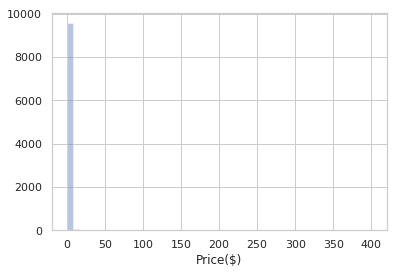

In [12]:
sns.distplot(gpsa['Price($)'],kde=False)

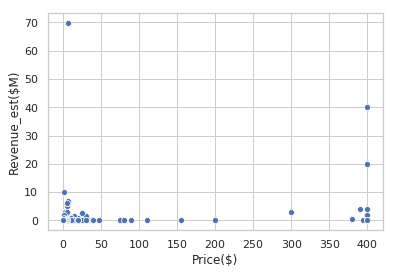

In [13]:
sns.scatterplot(gpsa['Price($)'], gpsa['Revenue_est($M)'])

## Apps & Installs Breakdown

In [14]:
print('Total number of Installs are over {} billions'.format(cat.Installs.sum()/ 10**9))

Total number of Installs are over 75.322526427 billions


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

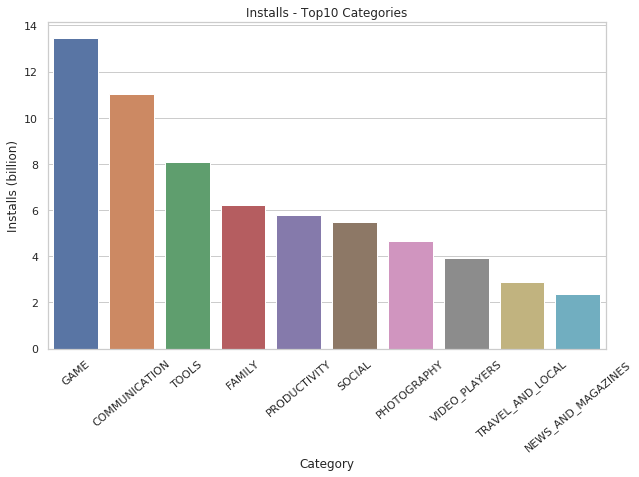

In [15]:
cat_i = cat.sort_values('Installs', ascending = False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x=cat_i.head(10).Category, y=cat_i.head(10).Installs/10**9)
plt.title('Installs - Top10 Categories')
plt.ylabel('Installs (billion)')
plt.xticks(rotation=40)

In [16]:
tp = gpsa.groupby('Type').agg({'App':'count', 'Installs':'sum', 'Rating':'mean', 'Reviews':'sum'})
tp

,App,Installs,Rating,Reviews
Type,,,,
Free,8904,75265162646,4.166223,2087514902
Paid,754,57363781,4.262126,6596000


In [17]:
cat_tp = gpsa.groupby(['Category','Type'])['App'].count().unstack()
cat_tp['total_app'] = cat_tp.Free + cat_tp.Paid 
cat_tp = cat_tp.sort_values('total_app',ascending= False).reset_index()
cat_tp.head()

Type,Category,Free,Paid,total_app
0,FAMILY,1689.0,184.0,1873.0
1,GAME,864.0,82.0,946.0
2,TOOLS,751.0,78.0,829.0
3,BUSINESS,408.0,12.0,420.0
4,MEDICAL,313.0,82.0,395.0


In [18]:
cat_tp1 = gpsa.groupby(['Category','Type'])['Installs'].sum().unstack()
cat_tp1 ['total_installs'] = cat_tp1.Free + cat_tp1.Paid 
cat_tp1 = cat_tp1.sort_values('total_installs',ascending= False).reset_index()
cat_tp1.head()

Type,Category,Free,Paid,total_installs
0,GAME,1.343692e+10,20999965.0,1.345792e+10
1,COMMUNICATION,1.103692e+10,1360050.0,1.103828e+10
2,TOOLS,8.101044e+09,1727441.0,8.102772e+09
3,FAMILY,6.200392e+09,21149814.0,6.221542e+09
4,PRODUCTIVITY,5.791679e+09,1412055.0,5.793091e+09


[None]

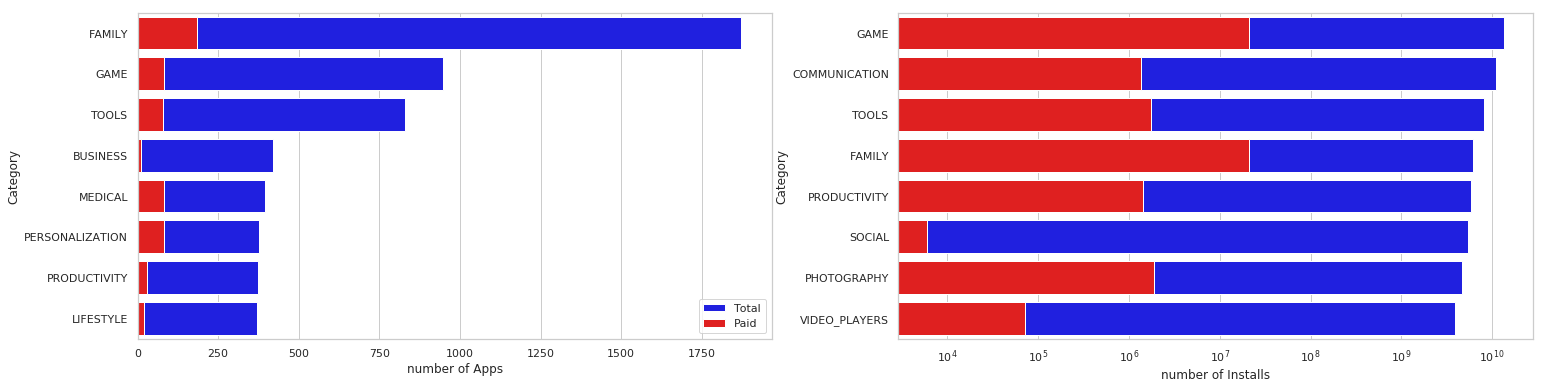

In [19]:
fig,ax = plt.subplots(1,2, figsize = (25,6))
sns.barplot(x=cat_tp.head(8).total_app, y=cat_tp.head(8).Category, ax=ax[0], label='Total', color = 'blue')
sns.barplot(x=cat_tp.head(8).Paid, y=cat_tp.head(8).Category, ax=ax[0], label='Paid', color='red')
ax[0].set_xlabel('number of Apps')
ax[0].legend()

sns.barplot(x=cat_tp1.head(8).total_installs, y=cat_tp1.head(8).Category, ax=ax[1], label='Total', color= 'blue')
sns.barplot(x=cat_tp1.head(8).Paid, y=cat_tp1.head(8).Category, ax=ax[1], label='Paid', color='red')
ax[1].set_xlabel('number of Installs')
ax[1].set(xscale='log')

In [20]:
cat_app_inst = pd.merge(cat_tp, cat_tp1, on='Category', suffixes = ['_app','_installs'])
cat_summary = cat_app_inst.merge(cat[['Category','Revenue_est($M)','Rating', 'Reviews']], on='Category')
cat_summary.head()

,Category,Free_app,Paid_app,total_app,Free_installs,Paid_installs,total_installs,Revenue_est($M),Rating,Reviews
0,FAMILY,1689.0,184.0,1873.0,6.200392e+09,21149814.0,6.221542e+09,115.674845,4.183445,193470282
1,GAME,864.0,82.0,946.0,1.343692e+10,20999965.0,1.345792e+10,40.688637,4.244605,590772190
2,TOOLS,751.0,78.0,829.0,8.101044e+09,1727441.0,8.102772e+09,5.464821,4.040278,229471630
3,BUSINESS,408.0,12.0,420.0,6.969521e+08,212775.0,6.971649e+08,1.050543,4.098479,9891023
4,MEDICAL,313.0,82.0,395.0,3.773234e+07,560733.0,3.829308e+07,5.956237,4.165862,1187538


In [21]:
cat_summary.to_csv('./cat_summary.csv')

## Most Popular App

In [22]:
inst_rt = gpsa[cl_keep].sort_values(by=['Installs','Rating'], ascending = [False,False])
inst_rt.head(15)

,App,Category,Installs,Rating,Reviews,Price($),Revenue_est($M)
4937,Google Photos,PHOTOGRAPHY,1000000000,4.5,10859051,0.0,0.0
5399,Instagram,SOCIAL,1000000000,4.5,66577446,0.0,0.0
8079,Subway Surfers,GAME,1000000000,4.5,27725352,0.0,0.0
4912,Google,TOOLS,1000000000,4.4,8033493,0.0,0.0
4924,Google Drive,PRODUCTIVITY,1000000000,4.4,2731211,0.0,0.0
9041,WhatsApp Messenger,COMMUNICATION,1000000000,4.4,69119316,0.0,0.0
4869,Gmail,COMMUNICATION,1000000000,4.3,4604483,0.0,0.0
4921,Google Chrome: Fast & Secure,COMMUNICATION,1000000000,4.3,9643041,0.0,0.0
4939,Google Play Games,FAMILY,1000000000,4.3,7168735,0.0,0.0
6050,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1000000000,4.3,9235373,0.0,0.0


In [23]:
max_rt = gpsa[cl_keep].sort_values('Rating', ascending=False)
max_rt.head(10)

,App,Category,Installs,Rating,Reviews,Price($),Revenue_est($M)
267,AJ Rafael Music Lessons,FAMILY,10,5.0,1,0.0,0.0
2584,Cloud DX Connected Health,HEALTH_AND_FITNESS,100,5.0,6,0.0,0.0
3538,EB Scanner,PRODUCTIVITY,50,5.0,9,0.0,0.0
3531,EB Cash Collections,BUSINESS,5,5.0,1,0.0,0.0
1102,BJ Foods,BUSINESS,10,5.0,3,0.0,0.0
4209,FK CLASSIC FOR YOU,BUSINESS,10,5.0,1,0.0,0.0
7945,South Florida AA Meetings,LIFESTYLE,1000,5.0,10,0.0,0.0
1848,C B Patel Health Club,HEALTH_AND_FITNESS,100,5.0,5,0.0,0.0
708,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5,5.0,1,0.0,0.0
8816,Victoria EC,TOOLS,500,5.0,5,0.0,0.0


### Most Popular Paid Apps

In [24]:
inst_rt_paid = gpsa[gpsa.Type=='Paid'][cl_keep].sort_values(by=['Installs','Rating'], ascending = [False,False])
inst_rt_paid.head(10)

,App,Category,Installs,Rating,Reviews,Price($),Revenue_est($M)
5197,Hitman Sniper,GAME,10000000,4.6,408292,0.99,9.90
6211,Minecraft,FAMILY,10000000,4.5,2376564,6.99,69.90
9052,Where's My Water?,FAMILY,1000000,4.7,188740,1.99,1.99
1695,Bloons TD 5,FAMILY,1000000,4.6,190086,2.99,2.99
2772,Cut the Rope GOLD,FAMILY,1000000,4.6,61264,0.99,0.99
3432,DraStic DS Emulator,GAME,1000000,4.6,87766,4.99,4.99
4484,Five Nights at Freddy's,GAME,1000000,4.6,100805,2.99,2.99
8272,Tasker,TOOLS,1000000,4.6,43045,2.99,2.99
5888,Lost Journey (Dreamsky),GAME,1000000,4.5,32344,0.99,0.99
7853,Sleep as Android Unlock,LIFESTYLE,1000000,4.5,23966,5.99,5.99


In [25]:
rt_paid = gpsa[gpsa.Type=='Paid'][cl_keep].sort_values(by=['Rating'], ascending = False)
rt_paid.head(10)

,App,Category,Installs,Rating,Reviews,Price($),Revenue_est($M)
6809,P-Home for KLWP,PERSONALIZATION,100,5.0,4,0.99,0.000099
4266,FO Bixby,PERSONALIZATION,100,5.0,5,0.99,0.000099
315,AP Art History Flashcards,FAMILY,10,5.0,1,29.99,0.000300
3856,Easy Hotspot Ad Free,TOOLS,10,5.0,2,0.99,0.000010
2024,CI 174 Gray Icon Pack,PERSONALIZATION,10,5.0,1,0.99,0.000010
980,BC MVA Fines,BOOKS_AND_REFERENCE,50,5.0,5,1.75,0.000087
7671,Santa's Monster Shootout DX,GAME,50,5.0,4,1.99,0.000100
1886,CA Speakers,LIFESTYLE,100,5.0,12,0.99,0.000099
4188,FHR 5-Tier 2.0,MEDICAL,500,5.0,2,2.99,0.001495
9534,meStudying: AP English Lit,FAMILY,10,5.0,1,4.99,0.000050


## Paid vs Free App Ratings

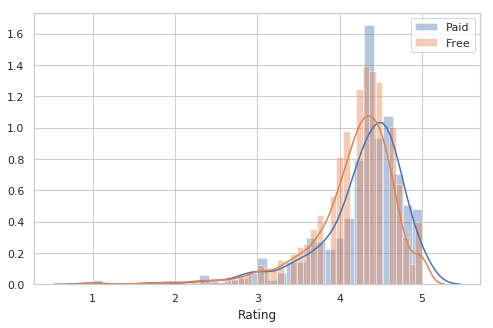

In [26]:
plt.figure(figsize = (8,5))
sns.distplot(gpsa[(gpsa.Type=='Paid')&(gpsa.Rating.notnull())]['Rating'], label = 'Paid')
sns.distplot(gpsa[(gpsa.Type=='Free')&(gpsa.Rating.notnull())]['Rating'], label='Free')

# sns.despine(left=True)
# plt.yticks([])
plt.legend()